### 0. 데이터셋 다운로드

주차공간 탐지 데이터셋 다운로드

### 1. 클래스 정보 카운팅하기

In [2]:
import os
import shutil
import random
import json

# 경로 설정
root_path = "/Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot"

#train_root = os.path.join(root_path, "training", sub_path)

subfolders = [folder for folder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, folder))]

In [3]:
print(root_path)

/Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot


In [4]:
import os
import json

# 클래스 개수를 저장할 딕셔너리
class_counts = {}

# 각 하위 폴더에 대해 json 파일 순회
for folder in subfolders:
    folder_path = os.path.join(root_path, folder, "label")
    #print(f"Processing folder: {folder_path}")

    # 폴더 내 JSON 파일 탐색 및 클래스 이름 추출
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.json'):  # json 파일만 선택
                file_path = os.path.join(folder_path, file_name)

                try:
                    with open(file_path, 'r') as json_file:
                        data = json.load(json_file)

                        # segmentation에서 클래스 이름 추출
                        if "segmentation" in data:
                            for item in data["segmentation"]:
                                class_name = item.get("name")
                                if class_name:
                                    # 클래스 개수 증가
                                    class_counts[class_name] = class_counts.get(class_name, 0) + 1

                        # bbox3d에서 클래스 이름 추출 (비어 있을 수도 있음)
                        if "bbox3d" in data:
                            for item in data["bbox3d"]:
                                class_name = item.get("name")
                                if class_name:
                                    # 클래스 개수 증가
                                    class_counts[class_name] = class_counts.get(class_name, 0) + 1

                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file {file_path}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

# 최종 결과 출력
print("\n발견된 클래스 개수 목록:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


발견된 클래스 개수 목록:
Driveable Space: 36191
Car: 261966
Parking Space: 40374
Cycle: 4524
Pedestrian: 554


- 3d만 뽑은 결과

In [6]:
import os
import json

# 클래스 개수를 저장할 딕셔너리
class_counts = {}

# 각 하위 폴더에 대해 json 파일 순회
for folder in subfolders:
    folder_path = os.path.join(root_path, folder, "label")
    #print(f"Processing folder: {folder_path}")

    # 폴더 내 JSON 파일 탐색 및 클래스 이름 추출
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.json'):  # json 파일만 선택
                file_path = os.path.join(folder_path, file_name)

                try:
                    with open(file_path, 'r') as json_file:
                        data = json.load(json_file)

#                         # segmentation에서 클래스 이름 추출
#                         if "segmentation" in data:
#                             for item in data["segmentation"]:
#                                 class_name = item.get("name")
#                                 if class_name:
#                                     # 클래스 개수 증가
#                                     class_counts[class_name] = class_counts.get(class_name, 0) + 1

                        # bbox3d에서 클래스 이름 추출 (비어 있을 수도 있음)
                        if "bbox3d" in data:
                            for item in data["bbox3d"]:
                                class_name = item.get("name")
                                if class_name:
                                    # 클래스 개수 증가
                                    class_counts[class_name] = class_counts.get(class_name, 0) + 1

                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file {file_path}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

# 최종 결과 출력
print("\n발견된 클래스 개수 목록:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


발견된 클래스 개수 목록:
Car: 261966
Cycle: 4524
Pedestrian: 554


In [7]:
import os
import json

# 클래스 개수를 저장할 딕셔너리
class_counts = {}

# 각 하위 폴더에 대해 json 파일 순회
for folder in subfolders:
    folder_path = os.path.join(root_path, folder, "label")
    #print(f"Processing folder: {folder_path}")

    # 폴더 내 JSON 파일 탐색 및 클래스 이름 추출
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.json'):  # json 파일만 선택
                file_path = os.path.join(folder_path, file_name)

                try:
                    with open(file_path, 'r') as json_file:
                        data = json.load(json_file)

                        # bbox2d에서 클래스 이름 추출 (비어 있을 수도 있음)
                        if "bbox2d" in data:
                            for item in data["bbox2d"]:
                                class_name = item.get("name")
                                if class_name:
                                    # 클래스 개수 증가
                                    class_counts[class_name] = class_counts.get(class_name, 0) + 1

                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file {file_path}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

# 최종 결과 출력
print("\n발견된 클래스 개수 목록:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


발견된 클래스 개수 목록:
Car: 395927
Parking Block: 53841
Traffic Pole: 5576
Movable Obstacle: 1647
Van: 4571
Other Vehicle: 10378
No Parking Stand: 6813
Motorbike: 5098
Adult: 1774
Parking Sign: 1124
Bicycle: 932
Adjustable Parking Pole: 399
Waste Tire: 65
Traffic Cone: 2640
Child: 286
Electric Car Charger: 1889
Water Container: 20
Other Road Barriers: 70
Electric Car Parking Space: 1112
Planter Barrier: 116
Speed Bump: 3156
Disabled Parking Space: 1751
Traffic Barricade: 177
Traffic Drum: 14
Electric Scooter: 207
Shopping Cart: 8
Gate Arm: 191
Cylindrical Bollard: 37
Barrier Gate: 122
Street Sign: 58
Traffic Light: 106
Pedestrian Light: 33
Two-wheeled Vehicle Parking Space: 8
U-shaped Bollard: 989
Stroller: 3


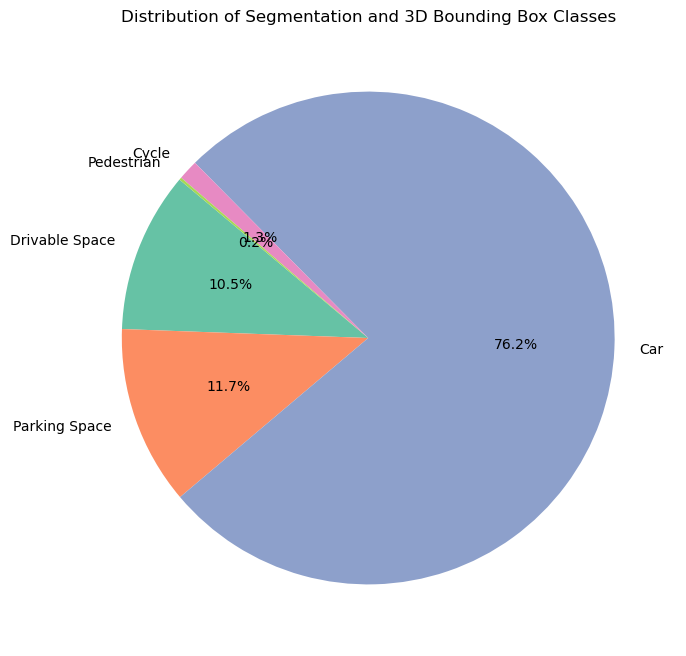

In [5]:
import matplotlib.pyplot as plt

# 각 클래스와 해당 수치
categories = ["Drivable Space", "Parking Space", "Car", "Cycle", "Pedestrian"]
counts = [36191, 40374, 261966, 4524, 554]

# 색상 설정
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]

# 원형 그래프 생성
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Segmentation and 3D Bounding Box Classes")

# 그래프 표시
plt.show()

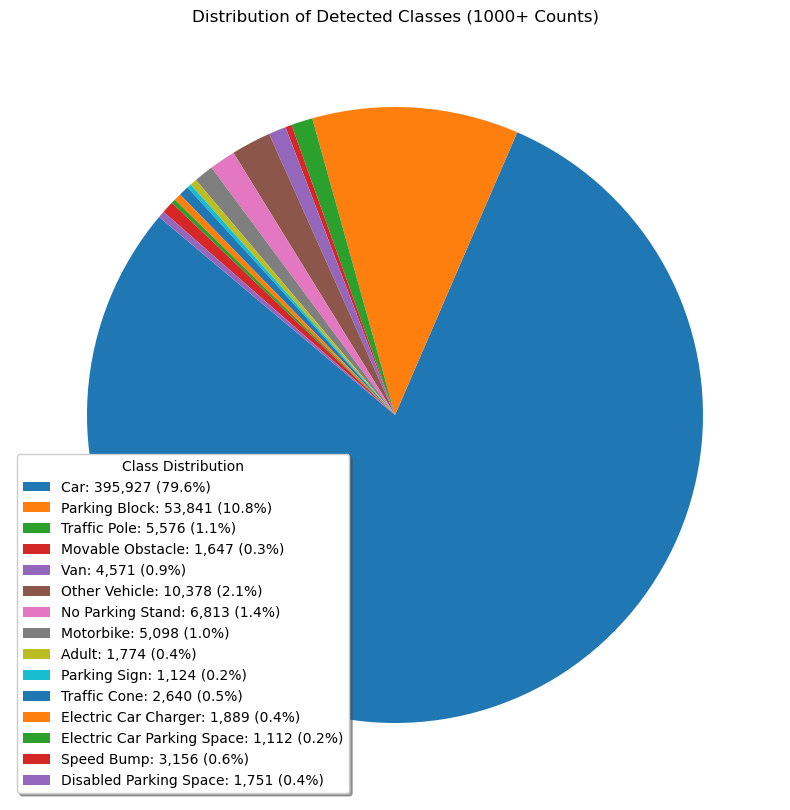

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 이름과 개수
categories = [
    "Car", "Parking Block", "Traffic Pole", "Movable Obstacle", "Van", "Other Vehicle",
    "No Parking Stand", "Motorbike", "Adult", "Parking Sign", "Bicycle", "Adjustable Parking Pole",
    "Traffic Cone", "Child", "Electric Car Charger", "Electric Car Parking Space", 
    "Planter Barrier", "Speed Bump", "Disabled Parking Space", "Traffic Barricade", 
    "Electric Scooter", "Gate Arm", "Barrier Gate", "Traffic Light", "U-shaped Bollard"
]
counts = [
    395927, 53841, 5576, 1647, 4571, 10378, 6813, 5098, 1774, 1124, 932, 399, 
    2640, 286, 1889, 1112, 116, 3156, 1751, 177, 207, 191, 122, 106, 989
]

# 1000 이상인 클래스만 선택
filtered_categories = [cat for cat, count in zip(categories, counts) if count >= 1000]
filtered_counts = [count for count in counts if count >= 1000]

# 원형 그래프 생성 (레이블을 없앰)
plt.figure(figsize=(10, 10))
wedges, _ = plt.pie(filtered_counts, startangle=140, pctdistance=0.85)

# 레이블의 위치를 수동으로 조정하기
for i, text in enumerate(_):
    # 각 텍스트 위치를 설정하기 위한 극좌표 계산
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    x = np.cos(np.radians(angle)) * 1.4  # 텍스트 위치 조정 (x)
    y = np.sin(np.radians(angle)) * 1.4  # 텍스트 위치 조정 (y)
    
    # 텍스트 위치 설정
    text.set_position((x, y))

# 그래프 제목
plt.title("Distribution of Detected Classes (1000+ Counts)")

# 왼쪽 하단에 범례 추가 (클래스와 비율)
labels = [f"{cat}: {count:,} ({count/sum(filtered_counts)*100:.1f}%)" for cat, count in zip(filtered_categories, filtered_counts)]
plt.legend(labels, loc="lower left", fontsize=10, title="Class Distribution", bbox_to_anchor=(0, 0), frameon=True, shadow=True)

# 그래프 표시
plt.show()

---
### seg -> 데이터셋 필터링 및 분할 과정
- 세그멘테이션 폴더 JSON 폴더 필터링

In [1]:
import os
import shutil
import random
import json

# 경로 설정
root_path = "/Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot"

subfolders = [folder for folder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, folder))]

In [2]:
# 검색할 클래스 리스트
target_classes = ["Driveable Space", "Parking Space"]

# JSON 파일에서 'bbox2d'와 'segmentation' 데이터를 추출하고, 새로운 JSON 파일로 저장하는 함수
def extract_and_save_data(root_path, subfolders, target_classes):
    # 출력 폴더 설정 (새 폴더 경로)
    output_dir = "/Users/foto2/jupyter_notebook/likelion_CV/original_filtered_labels"
    os.makedirs(output_dir, exist_ok=True)

    # 각 하위 폴더에서 JSON 파일 순회
    for folder in subfolders:
        json_dir = os.path.join(root_path, folder,"label")
        #print(f"Processing folder: {json_dir}")

        # 디렉토리 내 모든 JSON 파일 탐색
        for filename in os.listdir(json_dir):
            if filename.endswith(".json"):
                file_path = os.path.join(json_dir, filename)

                # JSON 파일 열기
                with open(file_path, 'r') as json_file:
                    try:
                        data = json.load(json_file)
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON in file {filename}")
                        continue  # 오류가 발생한 파일은 건너뜁니다.

                    # 'bbox2d'와 'segmentation' 데이터에서 대상 클래스만 필터링
                    extracted_data = {}
                    if "segmentation" in data:
                        filtered_segmentation = [item for item in data["segmentation"] if item["name"] in target_classes]
                        if filtered_segmentation:  # 유효한 데이터가 있는 경우에만 추가
                            extracted_data["segmentation"] = filtered_segmentation

                    # 추출된 데이터가 하나라도 있을 때만 새로운 JSON 파일로 저장
                    if extracted_data:
                        # 폴더 이름과 파일명을 합쳐서 새로운 파일 이름 생성
                        new_filename = f"{folder}_{filename}"
                        new_file_path = os.path.join(output_dir, new_filename)
                        
                        # 새로운 JSON 파일에 추출된 데이터 저장
                        with open(new_file_path, 'w') as new_json_file:
                            json.dump(extracted_data, new_json_file, indent=4)
                        #print(f"Extracted data saved to {new_file_path}")

# 함수 호출하여 JSON 파일 필터링 및 저장
extract_and_save_data(root_path, subfolders, target_classes)

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot386/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot386_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot386_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot386_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot386_00000284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot386_00000154.json


Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot375/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot381/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot388/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspa

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000137.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000072.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000121.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000208.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot388_00000176.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot310_00010786.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot310_00010790.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot310_00010728.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot310_00010682.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot310_00010689.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot317_00000216.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot317_00000353.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot317_00000241.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot317_00000304.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot317_00000240.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot328_00002462.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot328_00002527.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot328_00002435.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot328_00002570.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot328_00002507.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot326_00002128.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot326_00002082.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot326_00002190.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot326_00002169.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot326_00002186.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot319_00000759.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot319_00000718.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot319_00000734.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot319_00000671.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot319_00000763.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot389/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot389_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot389_00000007.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot389_00000011.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot389_00000046.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot389_00000085.json


Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot373/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot387/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000545.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000400.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000105.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000410.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000040.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000369.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot387_00000386.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot327_00002246.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot327_00002354.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot327_00002211.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot327_00002285.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot327_00002397.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot318_00000594.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot318_00000486.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot318_00000469.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot318_00000412.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot318_00000557.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot320_00000812.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot320_00000956.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot320_00000813.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot320_00000901.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot320_00000844.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot316_00000120.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot316_00000065.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot316_00000136.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot316_00000073.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot316_00000161.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot311_00010968.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot311_00010987.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot311_00010895.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot311_00010801.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot311_00010944.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot404_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot404_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot404_00000400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot404_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot404_00000284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot403_00000261.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot403_00000148.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot403_00000298.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot403_00000277.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot403_00000220.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000338.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000553.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000103.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000416.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000046.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000188.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000472.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000022.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000750.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot450_00000615.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot459_00000058.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot459_00000039.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot459_00000042.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot459_00000015.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot459_00000003.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot405_00000396.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot405_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot405_00000284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot405_00000154.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot405_00000441.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot434/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot460/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000816.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00001354.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000545.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000050.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000164.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000543.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000810.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00001352.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000955.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000150.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00001184.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000280.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00001242.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000900.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000268.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000638.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000287.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00000911.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot460_00001253.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot451_00000312.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot451_00000596.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot451_00000129.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot451_00000083.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot451_00000579.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000528.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000178.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000601.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000314.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000744.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000029.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000183.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000357.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000707.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot445_00000212.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot411/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot411_00000512.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot411_00000504.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot411_00000441.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot411_00000338.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot411_00000314.json


Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot443/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot444/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000379.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000034.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000464.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000126.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000063.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot444_00000219.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot410/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot410_00000545.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot410_00000953.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot410_00000512.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot410_00000284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot410_00000857.json


Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot428/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot333/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003369.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003386.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003410.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003447.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003405.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003307.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003491.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003350.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot333_00003429.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot302_00009129.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot302_00009083.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot302_00009200.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot302_00009109.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot302_00009148.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot305_00009608.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot305_00009628.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot305_00009782.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot305_00009690.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot305_00009669.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot394_00000133.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot394_00000099.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot394_00000308.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot394_00000021.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot394_00000113.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot393/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot393_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot393_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot393_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot393_00000007.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot393_00000154.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot304_00009433.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot304_00009599.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot304_00009444.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot304_00009501.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot304_00009413.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot303_00009272.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot303_00009337.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot303_00009225.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot303_00009360.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot303_00009233.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot332_00003396.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot332_00003400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot332_00003247.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot332_00003302.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot332_00003210.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot392_00000091.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot392_00000087.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot392_00000068.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot392_00000195.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot392_00000044.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot350/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot314/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011568.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011587.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011495.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011600.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011490.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011469.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011486.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011594.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot314_00011500.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot313_00011392.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot313_00011280.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot313_00011218.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot313_00011259.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot313_00011330.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot325_00001970.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot325_00001835.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot325_00001971.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot325_00001834.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot325_00001926.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot376/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot382/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot385/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000379.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspa

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000286.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000455.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000510.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000140.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot385_00000394.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot347/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot340/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot340_00004855.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot340_00004910.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot340_00004802.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot340_00004947.json
Extracted data saved to /Users/foto2/j

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot323_00001464.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot323_00001521.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot323_00001472.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot323_00001537.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot323_00001425.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot312_00011119.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot312_00011158.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot312_00011123.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot312_00011089.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot312_00011066.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot315_00011699.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot315_00011733.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot315_00011621.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot315_00011764.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot315_00011748.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot384/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot348/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot383/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot377/label
Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot453/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspk

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000078.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000717.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000347.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000652.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot453_00000202.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000375.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000725.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000230.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000660.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000549.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000957.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000812.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000541.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000956.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot454_00000813.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000461.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000174.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000436.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000066.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000089.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000429.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000583.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000079.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000215.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot462_00000491.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot409_00000314.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot409_00000206.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot409_00000139.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot409_00000181.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot409_00000302.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot400/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000816.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000545.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000400.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000543.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000810.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000056.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000406.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000390.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000192.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000468.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000038.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000311.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot400_00000741.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot407_00000058.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot407_00000097.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot407_00000039.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot407_00000042.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot407_00000107.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot464_00000556.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot464_00000106.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot464_00000385.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot464_00000690.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot464_00000487.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000289.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000773.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000323.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000636.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000266.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000328.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000282.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000778.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000797.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000502.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000920.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000189.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000473.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000023.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000832.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000320.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000818.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000232.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000398.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot463_00000662.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot452_00000646.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot452_00000353.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot452_00000187.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot452_00000492.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot452_00000168.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000641.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000354.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000587.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000092.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000568.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000403.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000116.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000546.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000395.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot406_00000680.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000495.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000211.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000641.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000354.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000704.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000798.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000262.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000777.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000327.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot408_00000848.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000440.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000285.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000143.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000456.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000006.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00001069.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000382.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000678.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000414.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot412_00000044.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot415_00000316.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot415_00000253.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot415_00000195.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot415_00000228.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot415_00000044.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot446_00000133.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot446_00000164.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot446_00000113.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot446_00000056.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot446_00000390.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot414/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot414_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot414_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot414_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot414_00000007.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot414_00000154.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001339.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003304.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002846.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001769.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002796.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001841.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000303.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003485.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002017.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001885.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002600.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002495.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001743.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002271.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002621.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000309.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002764.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003525.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003496.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001151.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000310.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002287.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001852.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000242.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002208.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000235.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002658.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001977.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002491.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001747.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00002868.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003280.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001317.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001731.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000435.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00000065.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00003219.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot413_00001224.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot449/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot449_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot449_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot449_00000400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot449_00000379.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot449_00000396.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000508.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000158.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000733.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000699.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000363.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000592.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000068.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000438.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000316.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot355_00000253.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000461.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000174.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000524.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000089.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000573.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000515.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000145.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000450.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000000.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000684.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000025.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000137.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000567.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000588.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot399_00000422.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot390_00000080.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot390_00000203.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot390_00000096.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot390_00000079.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot390_00000215.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot308/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010400.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010379.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010396.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010284.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010292.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010398.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010377.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010233.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010399.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot308_00010376.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot330_00002944.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot330_00002801.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot330_00002913.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot330_00002856.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot330_00002912.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot339_00004637.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot339_00004772.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot339_00004660.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot339_00004725.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot339_00004676.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot301_00008969.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot301_00008894.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot301_00008949.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot301_00008908.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot301_00008861.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Processing folder: /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/mspklot396/label
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot396_00000115.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot396_00000050.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot396_00000142.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot396_00000007.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot396_00000154.json


Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot353_00000211.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot353_00000354.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot353_00000092.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot353_00000138.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot353_00000207.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot398_00000190.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot398_00000485.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot398_00000368.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot398_00000387.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot398_00000554.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000416.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000046.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000380.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000197.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000528.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000536.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000166.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000189.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000473.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot354_00000023.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot338_00004424.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot338_00004561.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot338_00004473.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot338_00004536.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot338_00004465.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot307_00010055.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot307_00010110.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot307_00010002.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot307_00010147.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot307_00010014.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot331_00003136.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot331_00003073.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot331_00003120.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot331_00003065.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot331_00003177.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010437.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010572.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010460.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010525.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010509.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010561.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010424.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010577.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010432.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot309_00010598.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot336_00004053.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot336_00004100.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot336_00004045.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot336_00004157.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_filtered_labels/mspklot336_00004012.json
Extracted data saved to /Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot/original_fil

In [3]:
import os
import shutil
import random

# 원본 및 대상 경로 설정
original_filter_path = "/Users/foto2/jupyter_notebook/likelion_CV/original_filtered_labels"
filtered_labels_path = "/Users/foto2/jupyter_notebook/likelion_CV/filtered_labels"

# 대상 폴더가 존재하지 않으면 생성
os.makedirs(filtered_labels_path, exist_ok=True)

# 원본 폴더에서 모든 JSON 파일 목록 가져오기
json_files = [file for file in os.listdir(original_filter_path) if file.endswith(".json")]

# 파일 개수의 절반을 랜덤하게 선택
random_files = random.sample(json_files, len(json_files) // 4)

# 선택된 파일들을 대상 폴더에 복사
for file_name in random_files:
    src_file = os.path.join(original_filter_path, file_name)
    dest_file = os.path.join(filtered_labels_path, file_name)
    shutil.copy(src_file, dest_file)
    #print(f"Copied {file_name} to {filtered_labels_path}")

print(f"Total {len(random_files)} files copied to {filtered_labels_path}")

Copied mspklot315_00011705.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot393_00000133.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000122.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot462_00000283.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot354_00000025.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000514.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot303_00009224.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot394_00000080.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot449_00000493.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot415_00000027.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot324_00001667.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot398_00000282.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000494.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot453_00000393.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00001206.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot395_00000127.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot315_00011721.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot310_00010760.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot301_00008968.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot464_00000218.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00000160.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot399_00000586.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot399_00000584.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000658.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot312_00011028.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000372.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot314_00011538.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot334_00003710.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00001090.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000491.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot308_00010256.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000148.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot327_00002362.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot413_00001100.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot447_00000035.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00001286.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000061.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000237.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot406_00000204.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot326_00002020.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot326_00002198.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000424.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000655.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000671.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot318_00000478.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot390_00000057.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001595.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot466_00000145.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot410_00000345.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot405_00000412.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot462_00000112.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000340.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot466_00000078.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot409_00000050.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot386_00000091.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot354_00000133.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot399_00000450.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000556.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot387_00000220.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot332_00003284.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot307_00010190.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000619.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00000023.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000699.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot399_00000036.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001791.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot413_00003270.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002380.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot403_00000020.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00000058.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002837.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot310_00010642.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot314_00011456.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002500.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot414_00000125.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot403_00000205.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000245.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot408_00000245.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000211.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot404_00000136.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot412_00000290.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot398_00000465.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000358.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot329_00002694.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot312_00011094.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00000240.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000689.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000054.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot307_00010070.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot464_00000157.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000233.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot311_00010812.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot314_00011577.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot386_00000077.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000970.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot415_00000106.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000379.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000655.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot335_00003959.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot393_00000085.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot405_00000180.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00000445.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00003384.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot461_00000082.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot323_00001431.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot446_00000106.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot467_00000071.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot315_00011755.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot304_00009551.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000568.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot406_00000128.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot406_00000065.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot452_00000227.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot327_00002388.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot464_00000355.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot414_00000022.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot390_00000051.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000972.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot462_00000269.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot406_00000084.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot387_00000431.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot413_00002877.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000781.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot453_00000376.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot452_00000528.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002612.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002887.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot307_00010106.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot316_00000160.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002644.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot385_00000499.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot353_00000207.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot386_00000352.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot403_00000284.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002763.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot404_00000108.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001332.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot412_00000331.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot400_00000894.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000825.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000032.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot328_00002446.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot305_00009696.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot449_00000311.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot397_00000073.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000186.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot406_00000435.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot403_00000208.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000519.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000160.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000068.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000528.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot453_00000104.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001601.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot464_00000199.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot464_00000591.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot411_00000346.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000083.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot388_00000119.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000465.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot410_00000254.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot404_00000290.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot386_00000176.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot407_00000130.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot416_00000278.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot460_00000632.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot400_00000645.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot302_00009197.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002018.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot385_00000181.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot464_00000470.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot462_00000577.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000003.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000210.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot306_00009938.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot393_00000016.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot466_00000037.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000446.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot332_00003277.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot448_00000126.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot329_00002609.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000716.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000168.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot453_00000063.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000705.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000751.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00002654.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot453_00000279.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot320_00000850.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot331_00003172.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot467_00000053.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot323_00001415.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000412.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot400_00000631.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000394.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot403_00000038.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000649.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot310_00010641.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot453_00000070.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot399_00000103.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot331_00003072.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot454_00000327.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000335.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot412_00000273.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot309_00010593.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot452_00000212.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot451_00000136.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot405_00000052.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000382.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot412_00001138.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001014.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot396_00000076.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot460_00000149.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot452_00000474.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot453_00000592.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot397_00000310.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot462_00000174.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00000493.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot391_00000128.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot333_00003394.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot323_00001468.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot315_00011765.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot412_00001528.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot336_00004194.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot324_00001696.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000530.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot325_00001811.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot450_00000602.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001665.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot445_00000474.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001470.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot406_00000342.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot388_00000306.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot396_00000085.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot355_00000147.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot399_00000449.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot330_00002898.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00003331.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot317_00000352.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot408_00000480.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot405_00000082.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot326_00002144.json to /Users/foto2/jupyter_notebook/likel

Copied mspklot413_00003008.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot317_00000274.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot390_00000166.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot415_00000267.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot305_00009613.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot413_00001897.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot317_00000355.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot463_00000748.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot327_00002358.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot446_00000028.json to /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels
Copied mspklot312_00011074.json to /Users/foto2/jupyter_notebook/likel

In [4]:
import os

root_path = "/Users/foto2/jupyter_notebook/likelion_CV/filtered_labels"

# root_path 내의 모든 파일을 필터링
files = [file for file in os.listdir(root_path) if os.path.isfile(os.path.join(root_path, file))]

# 파일의 수 출력
print(f"Number of files in {root_path}: {len(files)}")

Number of files in /Users/foto2/jupyter_notebook/likelion_CV/filtered_labels: 8107


- 리사이즈 후 분할

In [1]:
from PIL import Image
import os
import shutil
import random

# 경로 설정
root_path = "/Users/foto2/jupyter_notebook/likelion_CV"

source_root = "/Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/source_data/indoor/mspklot"
label_root = "/Users/foto2/jupyter_notebook/likelion_CV/filtered_labels"

# 데이터셋 분할 비율
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# 출력 경로 설정
output_dirs = {
    "train": os.path.join(root_path, "seg_dataset/train"),
    "validation": os.path.join(root_path, "seg_dataset/validation"),
    "test": os.path.join(root_path, "seg_dataset/test")
}

# 출력 경로 생성
for split in output_dirs.values():
    os.makedirs(os.path.join(split, "images"), exist_ok=True)
    os.makedirs(os.path.join(split, "labels"), exist_ok=True)

# 이미지-라벨 쌍을 모아 분할
all_data_pairs = []

# 필터링된 JSON 파일을 순회하며 매칭되는 이미지 파일 찾기
for label_file in os.listdir(label_root):
    if label_file.endswith('.json'):
        # 파일 이름에서 폴더명과 파일명을 분리
        folder_name, file_name = label_file.rsplit('_', 1)
        file_name = file_name.split('.')[0]  # 확장자 제거하여 파일명 추출

        # 이미지와 라벨 파일 경로 설정
        image_folder = os.path.join(source_root, folder_name, "Camera")
        image_path = os.path.join(image_folder, f"{file_name}.jpg")
        label_path = os.path.join(label_root, label_file)

        # 이미지와 라벨 파일이 모두 존재하는 경우에만 추가
        if os.path.exists(image_path) and os.path.exists(label_path):
            all_data_pairs.append((image_path, label_path, folder_name, file_name))

# 데이터셋 무작위 셔플
random.shuffle(all_data_pairs)

# 분할 인덱스 계산
num_total = len(all_data_pairs)
num_train = int(num_total * train_ratio)
num_val = int(num_total * val_ratio)

# 데이터셋 분할
train_data = all_data_pairs[:num_train]
val_data = all_data_pairs[num_train:num_train + num_val]
test_data = all_data_pairs[num_train + num_val:]

# 이미지와 라벨 파일을 각각의 폴더로 이동하고 리사이즈
def move_files(data, split):
    for image_path, label_path, folder_name, file_name in data:
        # 새로운 파일 이름 생성
        new_image_name = f"{folder_name}_{file_name}.jpg"
        new_label_name = f"{folder_name}_{file_name}.json"

        # 이미지와 라벨 파일의 새로운 경로
        new_image_path = os.path.join(output_dirs[split], "images", new_image_name)
        new_label_path = os.path.join(output_dirs[split], "labels", new_label_name)

        # 이미지 리사이즈
        with Image.open(image_path) as img:
            resized_img = img.resize((640, 360))
            resized_img.save(new_image_path)

        # 라벨 파일 복사
        shutil.copy2(label_path, new_label_path)

# 파일 이동
move_files(train_data, "train")
move_files(val_data, "validation")
move_files(test_data, "test")

print("데이터셋 분할, 리사이즈 및 파일 이동이 완료되었습니다.")

데이터셋 분할, 리사이즈 및 파일 이동이 완료되었습니다.


###### 나중에 생각난 라벨링 리사이징 진행

In [1]:
import os
import json

# root 경로 설정 (사용자 환경에 맞게 경로를 지정)
root_path = "/Users/foto2/jupyter_notebook/likelion_CV/seg_dataset"

# 원래 이미지와 리사이즈된 이미지 크기
original_size = (1920, 1080)  # 원래 이미지 크기
new_size = (640, 360)  # 리사이즈된 이미지 크기
scale_x = new_size[0] / original_size[0]
scale_y = new_size[1] / original_size[1]

# 출력 디렉토리 지정
output_dirs = {
    "train": os.path.join(root_path, "train"),
    "validation": os.path.join(root_path, "validation"),
    "test": os.path.join(root_path, "test")
}

# segmentation 좌표 리사이즈 함수
def resize_polygon(polygon, scale_x, scale_y):
    return [[point[0] * scale_x, point[1] * scale_y] for point in polygon]

# 라벨 파일을 열어 좌표를 리사이즈 후 덮어쓰는 함수
def resize_label(label_path):
    with open(label_path, 'r') as file:
        label_data = json.load(file)

    # segmentation 배열에 있는 각 polygon 좌표들을 리사이즈
    for segment in label_data.get("segmentation", []):
        if "polygon" in segment:
            segment["polygon"] = resize_polygon(segment["polygon"], scale_x, scale_y)

    # 수정된 데이터를 원래 파일에 덮어쓰기
    with open(label_path, 'w') as file:
        json.dump(label_data, file, indent=4)

# 분할된 폴더 리스트
splits = ["train", "validation", "test"]

# 각 분할 폴더의 라벨 파일에 대해 리사이즈
for split in splits:
    label_dir = os.path.join(output_dirs[split], "labels")
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.json'):
            label_path = os.path.join(label_dir, label_file)
            resize_label(label_path)

print("라벨 파일의 polygon 좌표 리사이즈가 완료되었습니다.")

라벨 파일의 polygon 좌표 리사이즈가 완료되었습니다.


- 분할된 데이터셋 수 확인

In [2]:
import os

# 경로 설정
root_path = "/Users/foto2/jupyter_notebook/likelion_CV/seg_dataset"
dataset_dirs = {
    "train": os.path.join(root_path, "train"),
    "validation": os.path.join(root_path, "validation"),
    "test": os.path.join(root_path, "test")
}

# 각 폴더 내 파일 개수 출력
for split, path in dataset_dirs.items():
    images_path = os.path.join(path, "images")
    labels_path = os.path.join(path, "labels")

    # 이미지 및 라벨 파일 목록 확인
    image_files = os.listdir(images_path)
    label_files = os.listdir(labels_path)

    # 파일 개수 출력
    print(f"{split.capitalize()} 데이터셋:")
    print(f"  라벨 파일 개수: {len(label_files)}")
    print("-" * 30)

Train 데이터셋:
  이미지 파일 개수: 4864
  라벨 파일 개수: 4864
------------------------------
Validation 데이터셋:
  이미지 파일 개수: 1621
  라벨 파일 개수: 1621
------------------------------
Test 데이터셋:
  이미지 파일 개수: 1622
  라벨 파일 개수: 1622
------------------------------


- segmentation과 bbox3d가 같이 있는 파일??

In [1]:
import os
import json

# 경로 설정
root_path = "/Users/foto2/jupyter_notebook/likelion_CV/parkingspace_seg/data/training/label_data/indoor/mspklot"

# 하위 폴더 목록 불러오기
subfolders = [folder for folder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, folder))]

# 조건을 만족하는 파일 목록
matching_files = []

# 각 하위 폴더에서 JSON 파일을 검색
for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    for filename in os.listdir(subfolder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(subfolder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)

                # segmentation과 bbox3d 필드가 모두 비어있지 않은지 확인
                if data.get("segmentation") and data.get("bbox3d"):
                    if len(data["segmentation"]) > 0 and len(data["bbox3d"]) > 0:
                        # 폴더명과 파일명을 조합하여 리스트에 추가
                        matching_files.append(f"{subfolder}_{filename}")

# 결과 출력
print("조건을 만족하는 파일 목록:")
for file in matching_files:
    print(file)

조건을 만족하는 파일 목록:
